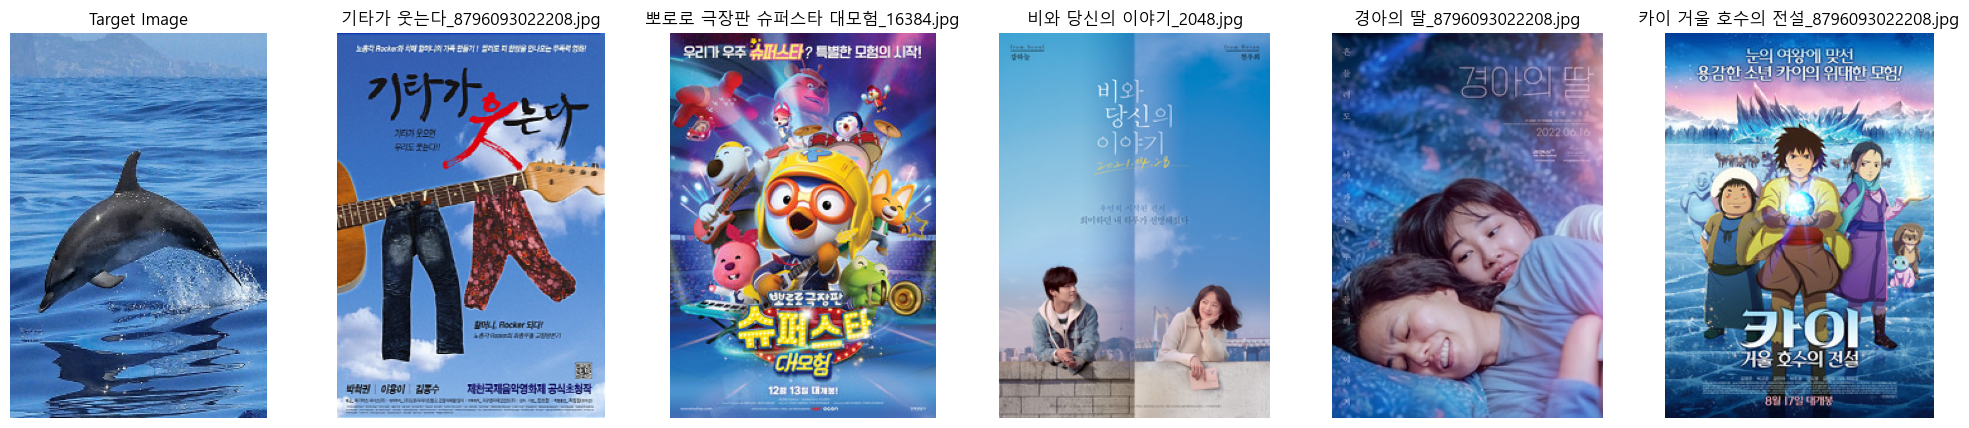

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.font_manager as fm

# 폰트 설정
font_path = r'C:\ex\prj_poster\MALGUN.TTF'  # 사용자 정의 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()

# 데이터셋 경로
dataset_path = r'G:\내 드라이브\project_poster\x_train'  # 'a' 폴더의 경로로 수정
# 비교할 이미지 경로로 수정
target_image_path = 'dolphin_test.jpg'

# 이미지 로드 함수
def load_images_from_folder(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            image_names.append(filename)
    return images, image_names

# 데이터셋에서 모든 이미지 로드
all_images = []
image_names = []
images, names = load_images_from_folder(dataset_path)
all_images.extend(images)
image_names.extend(names)

# 특징 추출 함수 (색 히스토그램 사용)
def extract_features(images):
    features = []
    for img in images:
        img = cv2.resize(img, (200, 300))  # 크기를 100x100으로 조정
        hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()  # 정규화
        features.append(hist)
    return np.array(features)

# 모든 이미지에 대해 특징 추출
features = extract_features(all_images)

# 비교할 이미지 로드 및 특징 추출
target_image = cv2.imread(target_image_path)
target_image = cv2.resize(target_image, (200, 300))
target_hist = cv2.calcHist([target_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
target_hist = cv2.normalize(target_hist, target_hist).flatten()

# KNN 모델을 사용하여 유사 이미지 검색
nbrs = NearestNeighbors(n_neighbors=5, metric='euclidean').fit(features)
distances, indices = nbrs.kneighbors([target_hist])

# 결과 시각화
plt.figure(figsize=(25, 5))
plt.rc('font', family=font_name)  # 사용자 정의 폰트 적용
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.title('Target Image')
plt.axis('off')

for i in range(5):
    plt.subplot(1, 6, i + 2)
    plt.imshow(cv2.cvtColor(all_images[indices[0][i]], cv2.COLOR_BGR2RGB))
    plt.title(image_names[indices[0][i]])
    plt.axis('off')

plt.show()

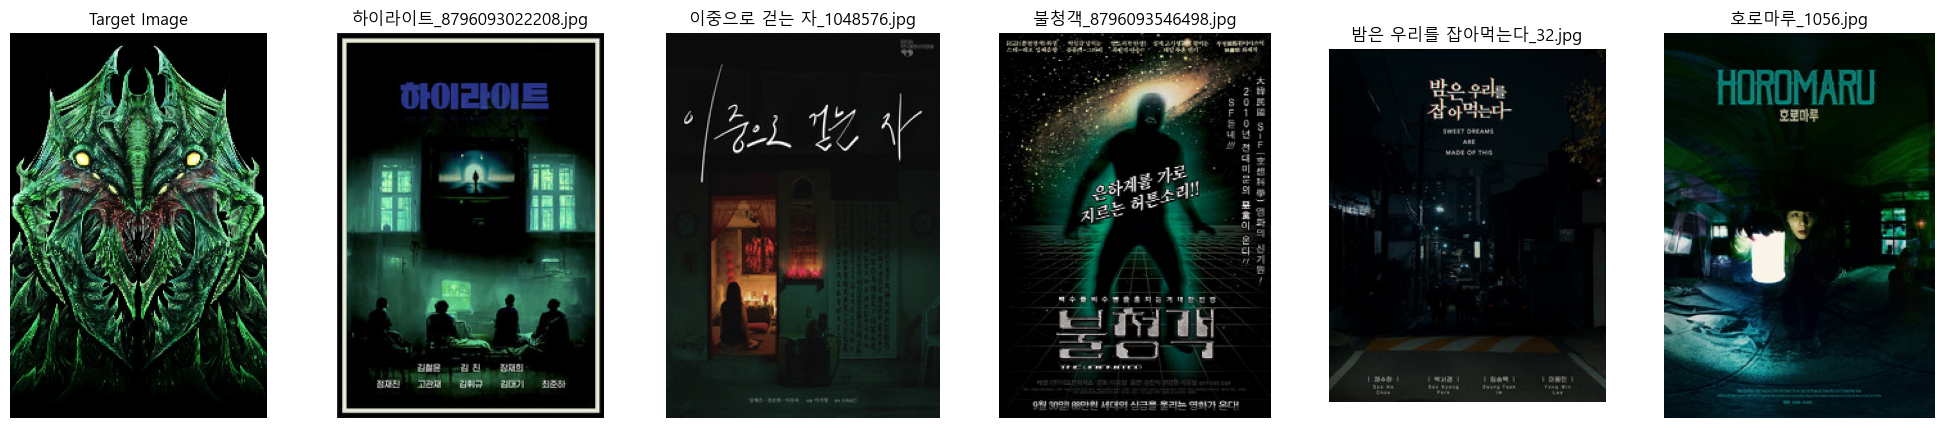

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.font_manager as fm

# 폰트 설정
font_path = r'C:\ex\prj_poster\MALGUN.TTF'  # 사용자 정의 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()

# 데이터셋 경로
dataset_path = r'G:\내 드라이브\project_poster\x_train'  # 'a' 폴더의 경로로 수정
# 비교할 이미지 경로로 수정
target_image_path = 'monster.jpg'

# 이미지 로드 함수
def load_images_from_folder(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            image_names.append(filename)
    return images, image_names

# 데이터셋에서 모든 이미지 로드
all_images = []
image_names = []
images, names = load_images_from_folder(dataset_path)
all_images.extend(images)
image_names.extend(names)

# 특징 추출 함수 (색 히스토그램 사용)
def extract_features(images):
    features = []
    for img in images:
        img = cv2.resize(img, (200, 300))  # 크기를 100x100으로 조정
        hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()  # 정규화
        features.append(hist)
    return np.array(features)

# 모든 이미지에 대해 특징 추출
features = extract_features(all_images)

# 비교할 이미지 로드 및 특징 추출
target_image = cv2.imread(target_image_path)
target_image = cv2.resize(target_image, (200, 300))
target_hist = cv2.calcHist([target_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
target_hist = cv2.normalize(target_hist, target_hist).flatten()

# KNN 모델을 사용하여 유사 이미지 검색
nbrs = NearestNeighbors(n_neighbors=5, metric='euclidean').fit(features)
distances, indices = nbrs.kneighbors([target_hist])

# 결과 시각화
plt.figure(figsize=(25, 5))
plt.rc('font', family=font_name)  # 사용자 정의 폰트 적용
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))
plt.title('Target Image')
plt.axis('off')

for i in range(5):
    plt.subplot(1, 6, i + 2)
    plt.imshow(cv2.cvtColor(all_images[indices[0][i]], cv2.COLOR_BGR2RGB))
    plt.title(image_names[indices[0][i]])
    plt.axis('off')

plt.show()